# Task 3: Cross-Country Comparison
**Objective:** Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests
from scipy.stats import f_oneway, kruskal

# Set plotting style
sns.set(style="whitegrid")


## Loading Cleaned Datasets
We will load the cleaned CSVs for each country and add a `country` column to identify them.


In [4]:
# Load cleaned datasets (robust file discovery if filenames differ)
from pathlib import Path

data_dir = Path("data")
if not data_dir.exists():
    # try to locate a 'data' directory upward from the current working directory
    cur = Path.cwd()
    for _ in range(6):  # check current dir and up to 5 parents
        candidate = cur / "data"
        if candidate.exists():
            data_dir = candidate
            break
        if cur.parent == cur:
            break
        cur = cur.parent
    else:
        # if not found, try to locate any CSV in the current tree and use its parent folder
        csvs = list(Path.cwd().rglob("*.csv"))
        if csvs:
            data_dir = csvs[0].parent
        else:
            raise FileNotFoundError(f"Data directory not found: {data_dir.resolve()}. Searched upward from {Path.cwd()} and scanned the current tree for CSV files.")

def find_csv(keywords):
	kws = [k.lower() for k in keywords]
	for p in data_dir.glob("*.csv"):
		name = p.name.lower()
		if all(k in name for k in kws):
			return p
	return None

benin_path = find_csv(["benin", "clean"]) or find_csv(["benin"])
sierra_path = find_csv(["sierra", "leone", "clean"]) or find_csv(["sierra", "leone"]) or find_csv(["sierra_leone", "clean"])
togo_path = find_csv(["togo", "clean"]) or find_csv(["togo"])

if not benin_path or not sierra_path or not togo_path:
	available = [p.name for p in data_dir.glob("*.csv")]
	raise FileNotFoundError(f"Could not locate all cleaned CSVs in {data_dir.resolve()}. Available CSVs: {available}")

benin = pd.read_csv(benin_path)
sierra_leone = pd.read_csv(sierra_path)
togo = pd.read_csv(togo_path)

# Add a country column
benin['country'] = 'Benin'
sierra_leone['country'] = 'Sierra Leone'
togo['country'] = 'Togo'

# Combine all datasets
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

# Preview combined data
df_all.head()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,...,BP,Cleaning,Precipitation,TModA,TModB,country,Unnamed: 0,Timestamp,Comments,cleaning_flag
0,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,...,998,0,0.0,26.3,26.2,Benin,NaN,NaN,NaN,NaN
1,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,...,998,0,0.0,26.3,26.2,Benin,NaN,NaN,NaN,NaN
2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,...,997,0,0.0,26.4,26.2,Benin,NaN,NaN,NaN,NaN
3,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,...,997,0,0.0,26.4,26.3,Benin,NaN,NaN,NaN,NaN
4,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,...,997,0,0.0,26.4,26.3,Benin,NaN,NaN,NaN,NaN


## Metric Comparison: GHI, DNI, DHI
We will create boxplots for each metric to visualize distributions across the three countries.


C:\Users\Y\AppData\Local\Temp\ipykernel_17684\1026496499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='country', y=metric, palette="Set2")


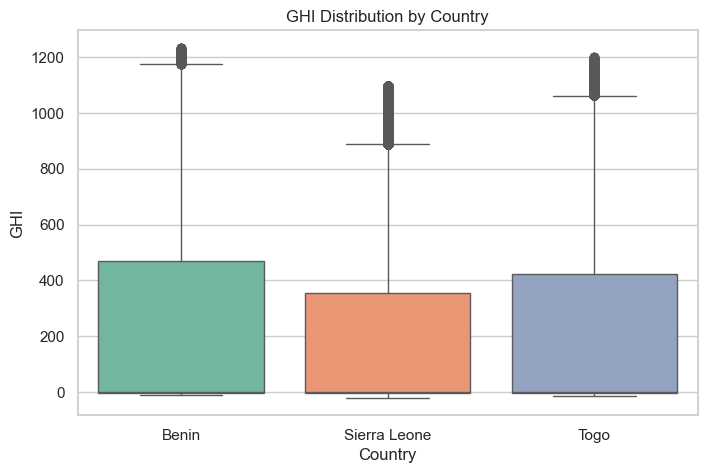

C:\Users\Y\AppData\Local\Temp\ipykernel_17684\1026496499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='country', y=metric, palette="Set2")


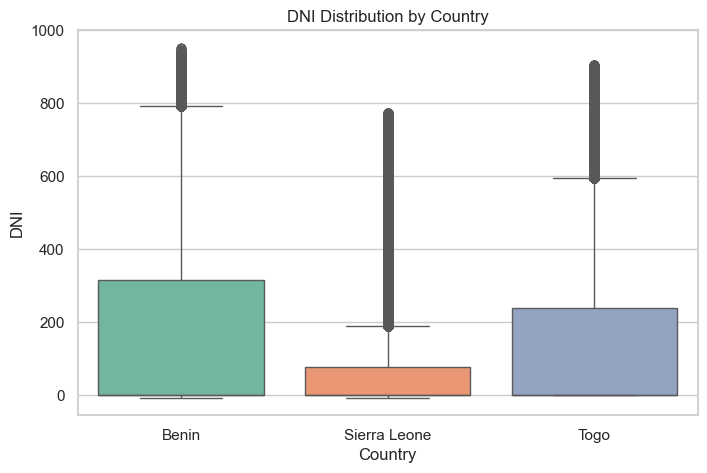

C:\Users\Y\AppData\Local\Temp\ipykernel_17684\1026496499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='country', y=metric, palette="Set2")


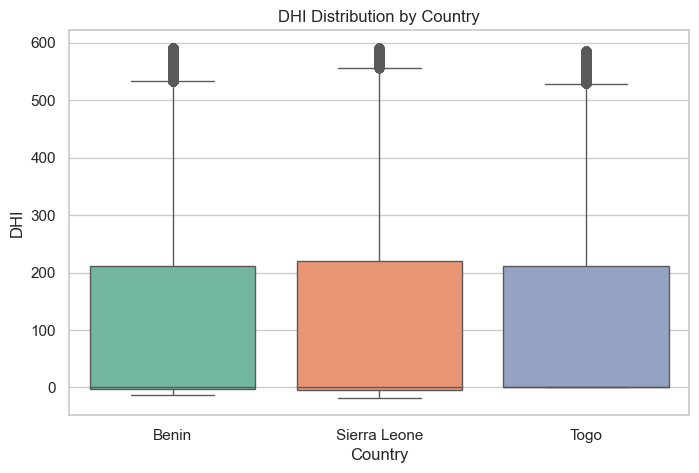

In [5]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_all, x='country', y=metric, palette="Set2")
    plt.title(f"{metric} Distribution by Country")
    plt.ylabel(metric)
    plt.xlabel("Country")
    plt.show()


## Summary Statistics
We calculate **mean, median, and standard deviation** for each metric across countries.


In [6]:
summary_table = df_all.groupby('country')[['GHI','DNI','DHI']].agg(['mean','median','std'])
summary_table


GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  196.441990    0.3  291.235290  104.527217   -0.1  201.696328   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  110.109541   -0.1  154.170508  
Togo          112.781249    1.5  151.571744

## Statistical Testing for GHI
We will perform a One-Way ANOVA and Kruskal-Wallis test to see if GHI differences between countries are statistically significant.
We will report p-values for both tests.


In [7]:
# Extract GHI values per country
ghi_benin = benin['GHI'].dropna()
ghi_sl = sierra_leone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

# One-Way ANOVA
anova_result = f_oneway(ghi_benin, ghi_sl, ghi_togo)

# Kruskal-Wallis test (non-parametric)
kruskal_result = kruskal(ghi_benin, ghi_sl, ghi_togo)

print("ANOVA result:", anova_result)
print("Kruskal-Wallis result:", kruskal_result)


ANOVA result: F_onewayResult(statistic=np.float64(2217.9984377271853), pvalue=np.float64(0.0))
Kruskal-Wallis result: KruskalResult(statistic=np.float64(4061.8490259294676), pvalue=np.float64(0.0))


## Key Observations

- **Togo** shows the highest median GHI but also the greatest variability.
- **Benin** appears more stable with lower variability across all metrics.
- **Sierra Leone** has lower median GHI but fewer extreme outliers.


## Average GHI Ranking
A visual ranking of countries based on mean GHI.


C:\Users\Y\AppData\Local\Temp\ipykernel_17684\2416136337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="Set3")


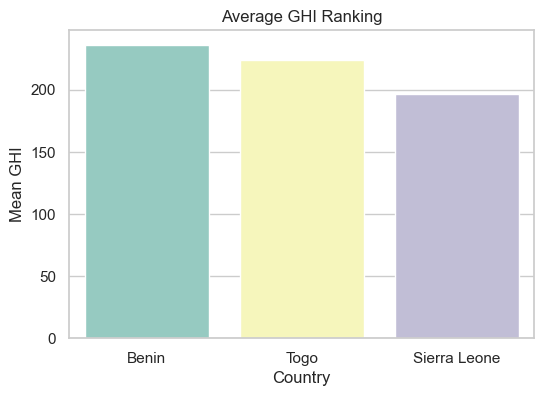

In [8]:
avg_ghi = df_all.groupby('country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="Set3")
plt.title("Average GHI Ranking")
plt.ylabel("Mean GHI")
plt.xlabel("Country")
plt.show()
